# Error-correction by repetition

<div style="width:100%;text-align:right;font-size:0.75em;opacity:0.2">Latex macros</div>
$\newcommand{\vec}[1]{\mathbf{#1}}$
$\newcommand{\ket}[1]{|#1\rangle}$
$\newcommand{\bra}[1]{\langle #1|}$
$\newcommand{\iu}{{i\mkern1mu}}$
$ \newcommand{\e}{\mathrm{e}}$
$\newcommand{\bigo}{\mathcal{O}}$
$\newcommand{\set}[1]{\{#1\}}$
$\newcommand{\oper}[1]{\mathcal{#1}}$
$\newcommand{\st}[1]{\mathcal{#1}}$
$\newcommand{\vecs}[1]{\mathcal{#1}}$
$\newcommand{\group}[1]{\mathcal{#1}}$
$\newcommand{\union}{\hspace{0.25em}\cup\hspace{0.25em}}$

Classical error-correction is a rich and old field which has produced many procedures for error-correction. To begin our journey through this field, we will start with the simplest possible method of error-correction. This method is called *repetition code*. The term 'code' refers to a mathematical object, which we will look at in more detail later on. For now, we will concentrate on what Alice and Bob do.

## When Alice and Bob don't use any error correction

Let us go back to scenario we created last time, and concretely work out what happens when Alice and Bob don't use any error correction.

![Error correction model](../../images/noclassicalerrorcorrection.png)

Alice wants to transmit a length-$k$ message $\vec{m}$, which is a sequence of bits. When she sends it, it gets distorted by noise $\vec{e}$, and what Bob receives is $\vec{\tilde{m}} = \vec{m} + \vec{e}$.

In general $\vec{e}$ can be any bit string, but lets define a simple yet realistic model for the kind of transmission noise we encounter in the real world. We assume that if we send a bit $m_i$ through the channel, with probability $p$ the bit will be flipped, and with probability $1-p$ it is not flipped. If we send multiple bits through the channel, each one is independently flipped with probability $p$. This means that 
\begin{equation}
 e_i = \begin{cases}
 1 \quad\text{with prob $p$},\\
 0 \quad\text{with prob $1-p$},
 \end{cases}
\end{equation}
where the value of each $e_i$ is independently set from the others.

Now, suppose that Bob receives the message $\vec{\tilde{m}} = 100$ from Alice. What can Bob infer from this? He doesn't know if any of the bits were flipped, so he can't say for sure that this is indeed the message that Alice wanted to send. The most he can infer is that each bit has $1-p$ chance of not getting flipped, so there is a $(1-p)^3$ that he received the right message. On the other hand, there is a $1-(1-p)^3$ chance he received the wrong message.

## Can Alice and Bob do better? 

To do better, Alice and Bob must do something other than just sending the message. The simplest process is one you are already familiar with, if you have ever talked to someone on the phone with a bad connection. To make sure they hear what you have to say, you repeat yourself a few times. More abstractly, you usually send a longer message from which it is easier for the person on the other end to infer what you said correctly. This abstract process is shown below.

![Error correction model](../../images/classicalerrorcorrectionmodel.png)

Instead of sending $\vec{m}$, Alice transforms her message into a longer bit-string called the *codeword* $\vec{c}$. This process is called *encoding*. She then sends this through the channel. On the other end, Bob receives a corrupted codeword $\vec{\tilde{c}}$. He subjects it to a process called *decoding*. If all goes well, then with higher probability than $(1-p)^k$, he will recover the correct message, i.e. $\vec{\hat{m}} = \vec{m}$. However, note that there will always be some non-zero chance of making a mistake, $\vec{\hat{m}} \ne \vec{m}$.

## Detecting and correcting by repetition
The process of detecting and correcting errors by repetition is as follows. Alice takes each bit $m_i$ in the message one by one. For each bit, if it has value $0$, Alice sends the *block* of bits $000$, and if it has value $1$, Alice sends the block $111$. Therefore, the codeword $\vec{c}$ will have length $n=3k$.

An alternate notation we will use throughout this book is to write messages with a bar on top, and write the codeword without any bars. For example, here we can simply write
$$
\bar{0} = 000, \quad \bar{1} = 111.
$$

Using the above process if the message is $\overline{1010}$ then Alice sends $111000111000$.

Suppose, that Bob receives the corrupted code-stream $101100111000$, in which the second and fourth bits have been flipped by the noisy channel. He, of course, doesn't know which bits have been flipped. 

To correct any errors, he will apply a *majority voting algorithm* to each block of three bits in the corrupted codeword. The first block is $101$, and since there are two 1s in it and one 0, he infers that the first sent bit is likely to be $\overline{1}$. Similarly, he infers from the second, third and fourth blocks of three, that the second, third and fourth bits are likely to be 0, 1 and 0, respectively. Hence, he correctly decodes the message to message was $\overline{1010}$.

Notice that this method only works if there is at most one bit flip in each block of three. If there are two or more flips in a block, then Bob inferred bit string will be different from the one Alice intended to send. For example, if the corrupted code-string was $101110111000$, then using the same algorithm Bob infers that that message was $1110$.

*Question:* What is the encoding of $\overline{011}$?

To make sure you understand the above process, you will now implement it as computer code.

#### Task 1
Complete the function `repetition_encode` that when passed a bit string, encodes it according to the repetition code.

* Parameters:\
  `message`: a `str` of any length, guaranteed to only contain 0 or 1.
* Returns:\
  `codeword`: a `str` that is the the encoded version of the `message`. Must have length three times the length of `message`.

In [1]:
def repetition_encode(data_stream):
    result = ''                     
    
    for i in range(len(data_stream)):  #loop through the length of the string 'message'
             
        if data_stream[i] == '0':     #If the string is '0' then encode it to '000'
            result += '000'
        elif data_stream[i] == '1':  #If the string is '1' then encode it to '111'          
            result += '111'      
        
    return result    
    
repetition_encode('1')

'111'

In [2]:
# check your solution
k = 3
for i in range(2**k):
    message = bin(i)[2:].zfill(k)
    codeword = repetition_encode(message)
    print(message, codeword)

000 000000000
001 000000111
010 000111000
011 000111111
100 111000000
101 111000111
110 111111000
111 111111111


The process the Bob uses to check and correct for errors is called *decoding*. 

#### Task 2
Complete the function `repetition_decode` that when passed a corrupted codeword, decodes it according to the repetition code. This include identifying any errors and correcting for them.

* Parameters:\
  `codeword`: a `str`, guaranteed to only contain 0 or 1, and length divisible by 3.
* Returns:\
  `estimated_message`: a `str` that is the the decoded version of the `codeword`

In [3]:
def repetition_decode(codeword):
    decode = '' 
    
    for i in range(0,len(codeword),3):
        string_chunk = codeword[i:i+3]
        a = string_chunk.count('1')
        if a>= 2:
            decode+= '1'
        else:
            decode+= '0'
            
    return decode
repetition_decode('100001110000110') 

'00101'

Here is a script that generates random messages, run them though the encoder, then corrupts the result, and finally decodes them. Use this to check your answers. Remember that if there are multiple error per block then, the estimated message should not be equal the original message.

In [4]:
from random import randint, random

# these are the two parameters we need to set
message_length = 5
p = 0.1

# create a random message
message = ''.join([str(randint(0,1)) for i in range(message_length)])
print('message = ', message)

# encode the message
codeword = repetition_encode(message)
print('codeword = ', codeword)

# send it through the noisy channel
corrupted_codeword = ''
for c in codeword:
    if random() < p:
        if c == '0':
            corrupted_codeword += '1'
        else:
            corrupted_codeword += '0'
    else:
        corrupted_codeword += c
print('corrupted_codeword = ', corrupted_codeword)
        
# decode it
estimated_message = repetition_decode(corrupted_codeword)
print('estimated_message = ', estimated_message)
print('Is message = estimated_message?', message == estimated_message)

message =  10011
codeword =  111000000111111
corrupted_codeword =  111000000111111
estimated_message =  10011
Is message = estimated_message? True


### How good is the repetition based process?
Whenever we come across an error-correction process, we should evaluate how effective it is at correcting errors. The following tasks help you figure this out on your own.

#### Task 3 (On paper)
Using the repetition code, what is the probability that Bob correctly infers the correct bit-string? Each block of three is treated separately, so we only need to estimate the probability of correct inference from each block. Let $p$ be the probability of error on a single bit. Let the probability of an error on each bit be independent.

**Solve:** The probability that Bob correctly infers the correct bit-string using the repetition code because repetition code can correct zero and one errors.

What is the probability of 

* zero errors,
* one error,
* two errors,
* three errors.

Don't forget the multiplicities.

**Solve:** 
 * The probability of zero error is $(1-p)(1-p)(1-p) = (1-p)^3$.
 * The probability of one error is $3p (1-p)(1-p) = 3p(1-p)^2$.
 * The probability of two errors is $3p(1-p)p = 3(1-p)p^2$.
 * The probability of three errors is $ p^3$.

#### Task 4
Consider the case of when Alice and Bob do not use any error correction process. Then if Alice sends a single bit, the probability of Bob infering the wrong bit against the physical probability of error $p$ is as follows. Obviously, it's a straight line.

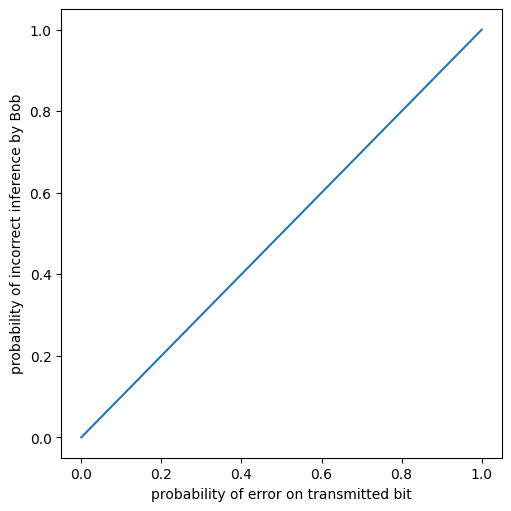

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# probability of error on transmitted bit
p = np.linspace(0, 1, 100)
# probability of incorrect inference by Bob
pr_of_incorrect_inference = p

_, ax = plt.subplots(figsize=(5, 5), layout='constrained');
ax.plot(p, pr_of_incorrect_inference);
ax.set_xlabel('probability of error on transmitted bit');
ax.set_ylabel('probability of incorrect inference by Bob');

When Alice and Bob do use error correction, plot the probability of incorrect inference by Bob vs the probability of error on a single bit $p$. Keep the line drawn above, so you can compare the two cases. For what values of $p$ is it beneficial to use error correction?

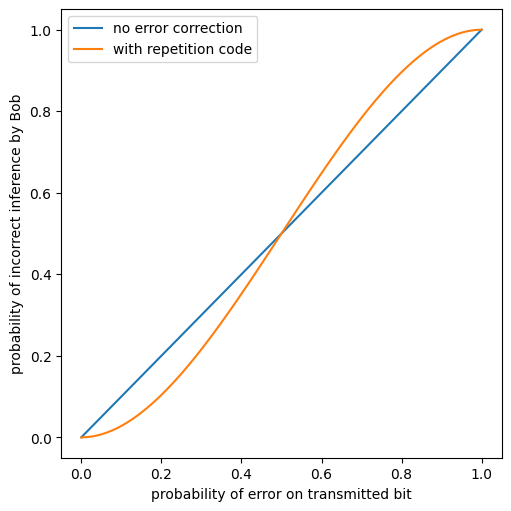

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# probability of error on transmitted bit
p = np.linspace(0, 1, 100)
# probability of incorrect inference by Bob
pr_of_incorrect_inference_repetition = p*p*p + 3*p*p*(1-p)

pr_of_incorrect_inference = p 

_, ax = plt.subplots(figsize=(5, 5), layout='constrained');
ax.plot(p, pr_of_incorrect_inference, label='no error correction'); 

# you can uncomment the line below to add another plot to the same figure
ax.plot(p, pr_of_incorrect_inference_repetition, label='with repetition code'); 

ax.set_xlabel('probability of error on transmitted bit');
ax.set_ylabel('probability of incorrect inference by Bob');
plt.legend();

What you will discover is that when the physical error rate $p$ is low, then the repetition code helps. However if $p$ is large then using the repetition code is actually worse than the naive process. Can you argue why?

**Solve:** From the plot error correction code works well if $p<0.5$. Above this threshold, using the repetition code is actually worse than the naive process. 

Using repetition code, the probability of two or more bit flips is $3p^2(1-p) + p^3 = 3p^2 -2p^3$. Without repetition code, the probability is $p$. 
So, the condition that repetition code is good enough is,


\begin{equation}
  \begin{aligned}
    3p^2 -2p^3 & < p\\
     \Longrightarrow p(3p-2p^2)& < p\\
      \Longrightarrow 3p-2p^2 & < 1 \\
      \Longrightarrow 3p-2p^2-1 & < 0 \\
      \Longrightarrow 2p^2-3p + 1 & > 0 \\
      \Longrightarrow 2p^2-2p -p + 1 & > 0 \\
      \Longrightarrow 2p(p-1) -1( p-1) & > 0 \\
      \Longrightarrow 2p(p-1) -1( p-1) & > 0 \\
      \Longrightarrow (2p-1) (p-1) & > 0 \\
      (2p-1) & > 0 \\ 
      \text{or}(p-1) & > 0     
  \end{aligned}
\end{equation}

So, p is either $> \frac{1}{2}$ or $p>1$. But p represents probability so can't be larger than 1. So, it can be said that if $p> \frac{1}{2}$ then repetition code works well than naive process. 

#### Task 5 (On paper, optional)
This exercise will become crucial when we later discuss fault-tolerant quantum computing.

Suppose that Alice has some encoded message. She wants to do some logical operations on the encoded message without decoding it first. How can she go about it? Concretely, how can she apply

* A NOT operation, that takes $\bar{0}$ to $\bar{1}$, and $\bar{1}$ to $\bar{0}$.
* An OR operation, that has the following truth table

|    Input      |     Output     |
|:-------------:|:--------------:|
|$\overline{00}$| $\overline{0}$|
|$\overline{01}$| $\overline{1}$|
|$\overline{10}$| $\overline{1}$|
|$\overline{11}$| $\overline{1}$|



* A NOT operation, that takes $\bar{0}$ to $\bar{1}$, and $\bar{1}$ to $\bar{0}$.

For **Not** gate,

Since there are three bits, so first NOT gate will be applied to the first bit, whcih changes 000 to 100, then NOT gate will be applied to this output. That is 100 will be changed to 110 and so on.
* An OR operation,

For **OR** operation,

 We have two code blocks. ($\overline{00}$) -> 000000. First assume that each 3 bits represents one block. Then ORing each bit of one block with another. Like 000 + 000 ... this way. So, at first OR gate will be applied to the first bits of each block and so on. This way we will get 000 or $\bar{0}$ and so on. 